In [ ]:
# importing the modules
import numpy as np
from numpy import random

from scipy import stats, integrate
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

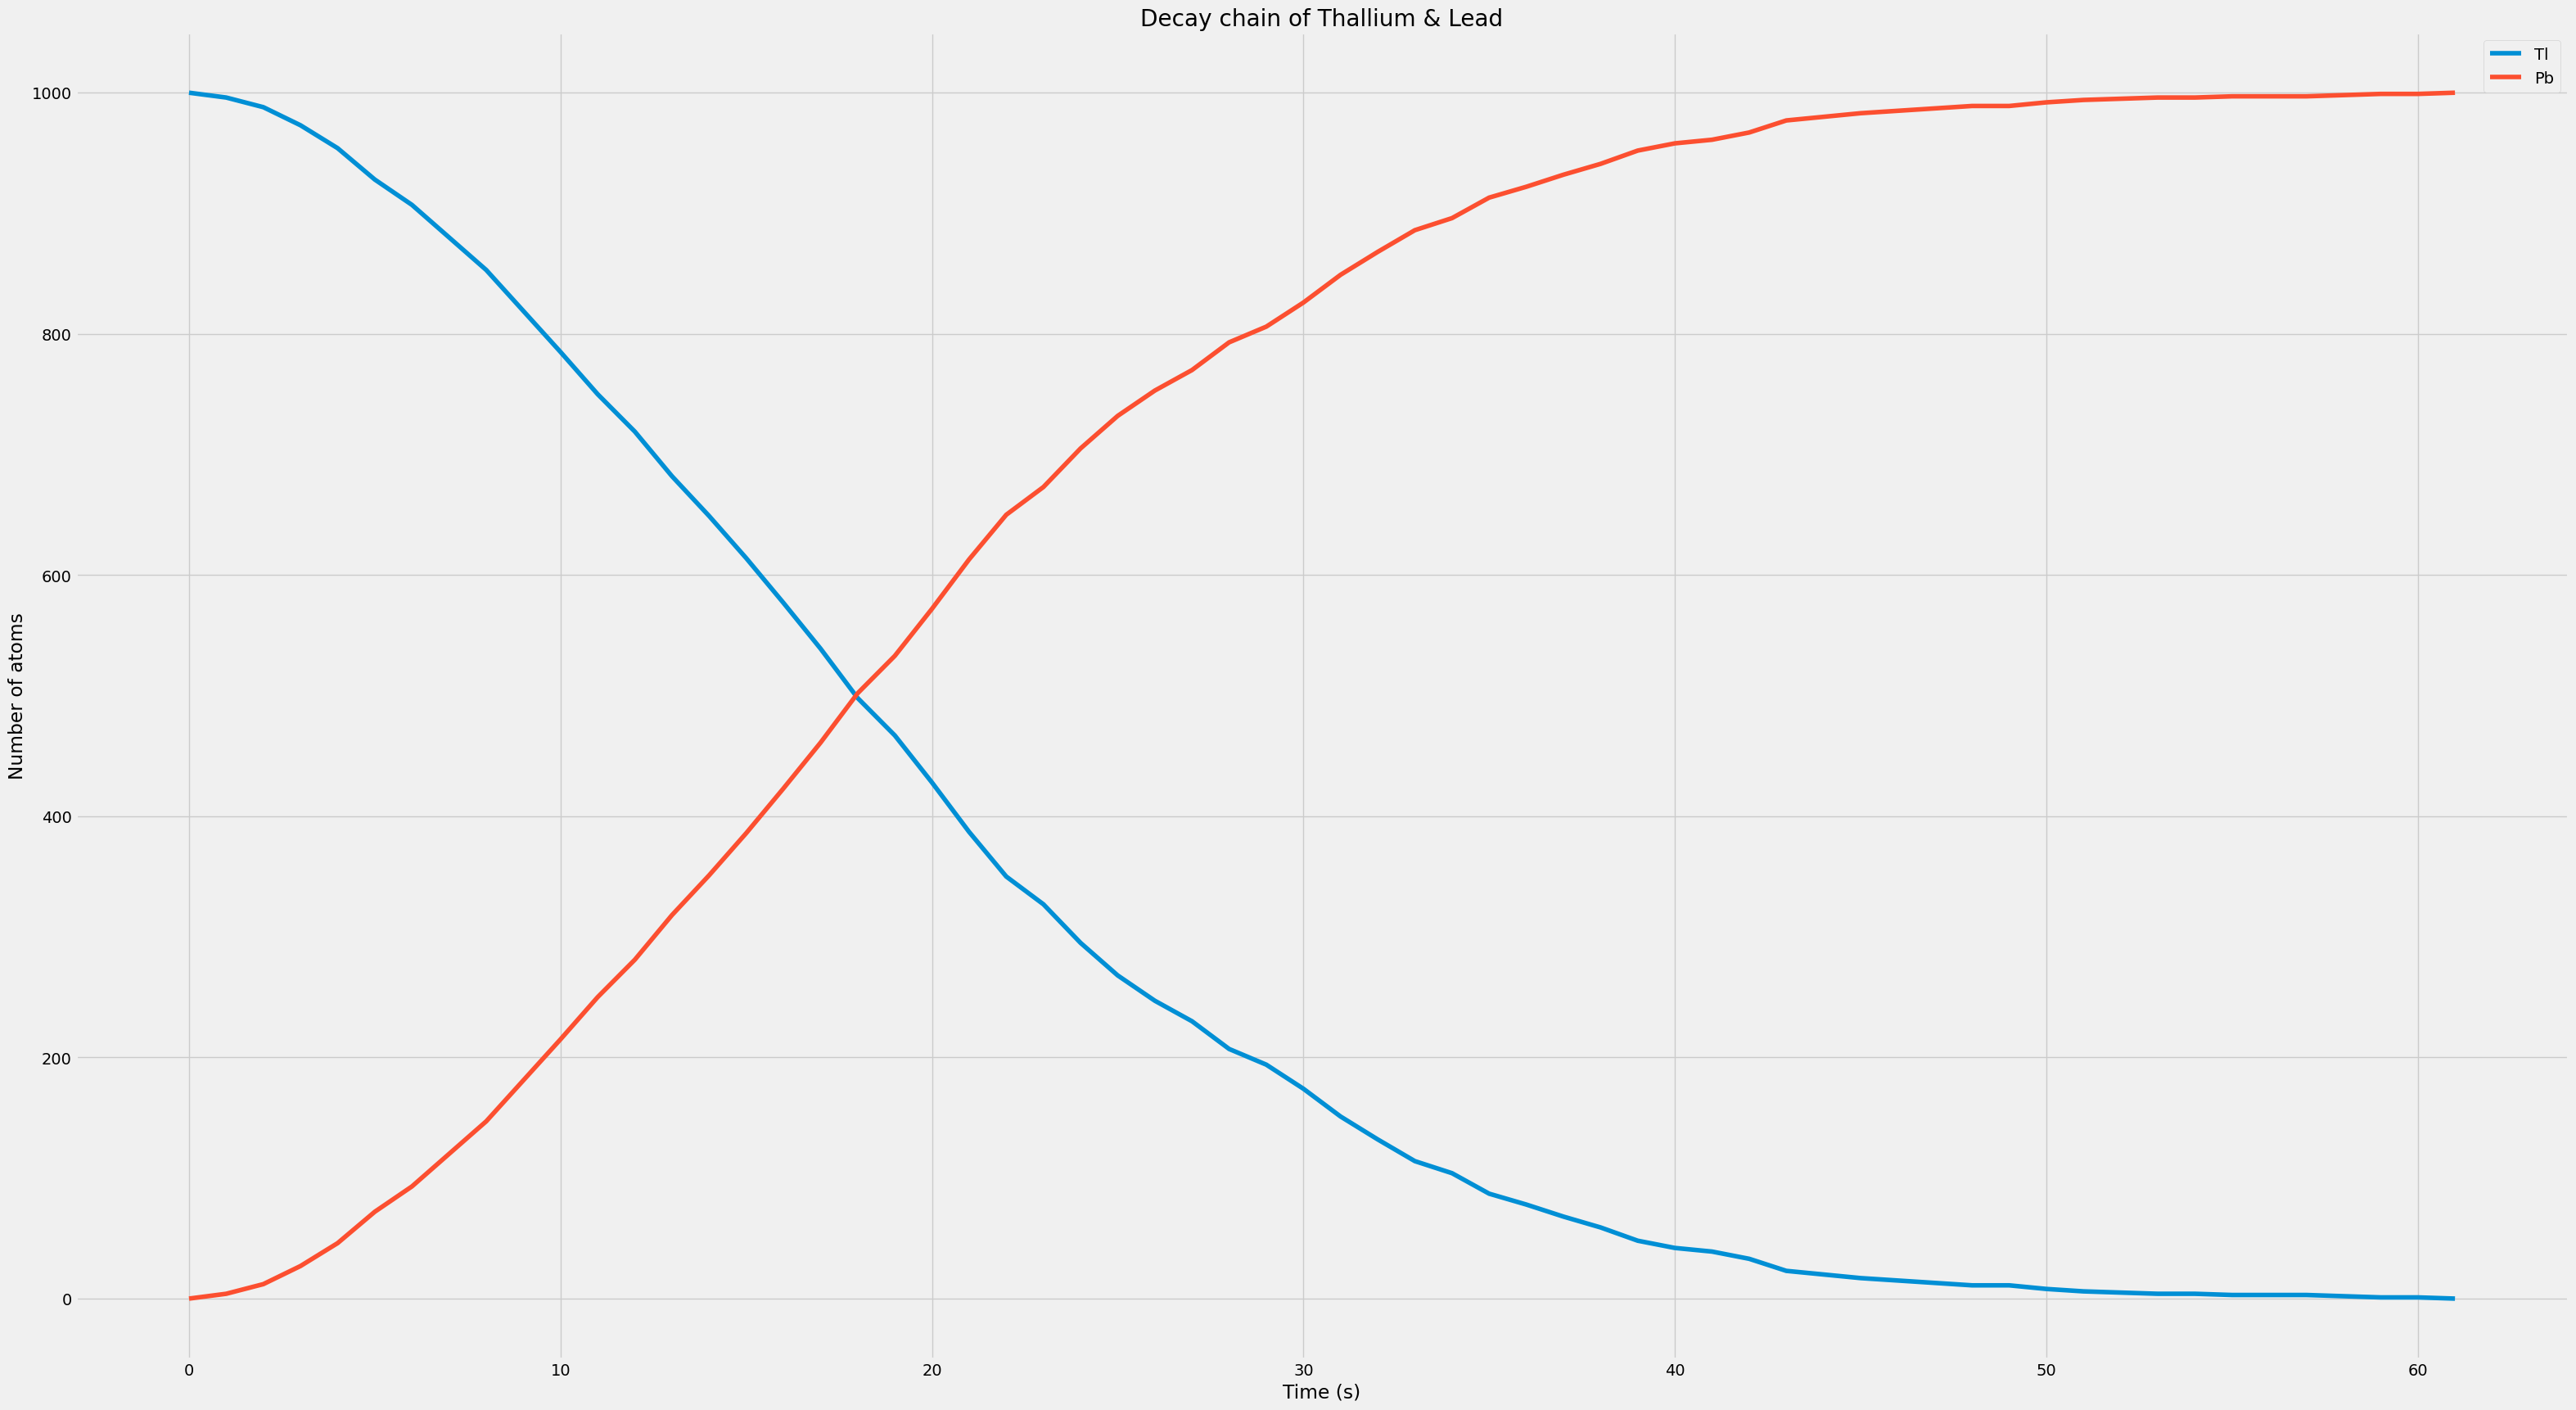

In [ ]:
# Initial values of Thallium , Lead and period
tl = 1000
pb = 0
period = 3.052*60

# the  probability at  t
p = lambda t : 1-2**(-t/period)

# List to store the number of Tl and Pb atoms at each  step
evolution_history = [[tl,pb]]
for i in range(1,1000):

    # random numbers
    random_numbers = np.random.random(tl)

    # number of atoms that decay
    decay_count = sum(random_numbers < p(i))
    tl = tl - decay_count
    pb = pb + decay_count
    evolution_history.append([tl,pb])
    if (tl == 0):
        break

# Ploting the evolution on function of time
plt.figure(figsize=(35,20))
plt.plot(evolution_history)
plt.title('Decay chain of Thallium & Lead')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend(['Tl','Pb'])

<ipython-input-6-352dd26515f7>:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  decay_count = np.sum(1 if (x>=i-1 and x < i) else 0 for x in decay_times)


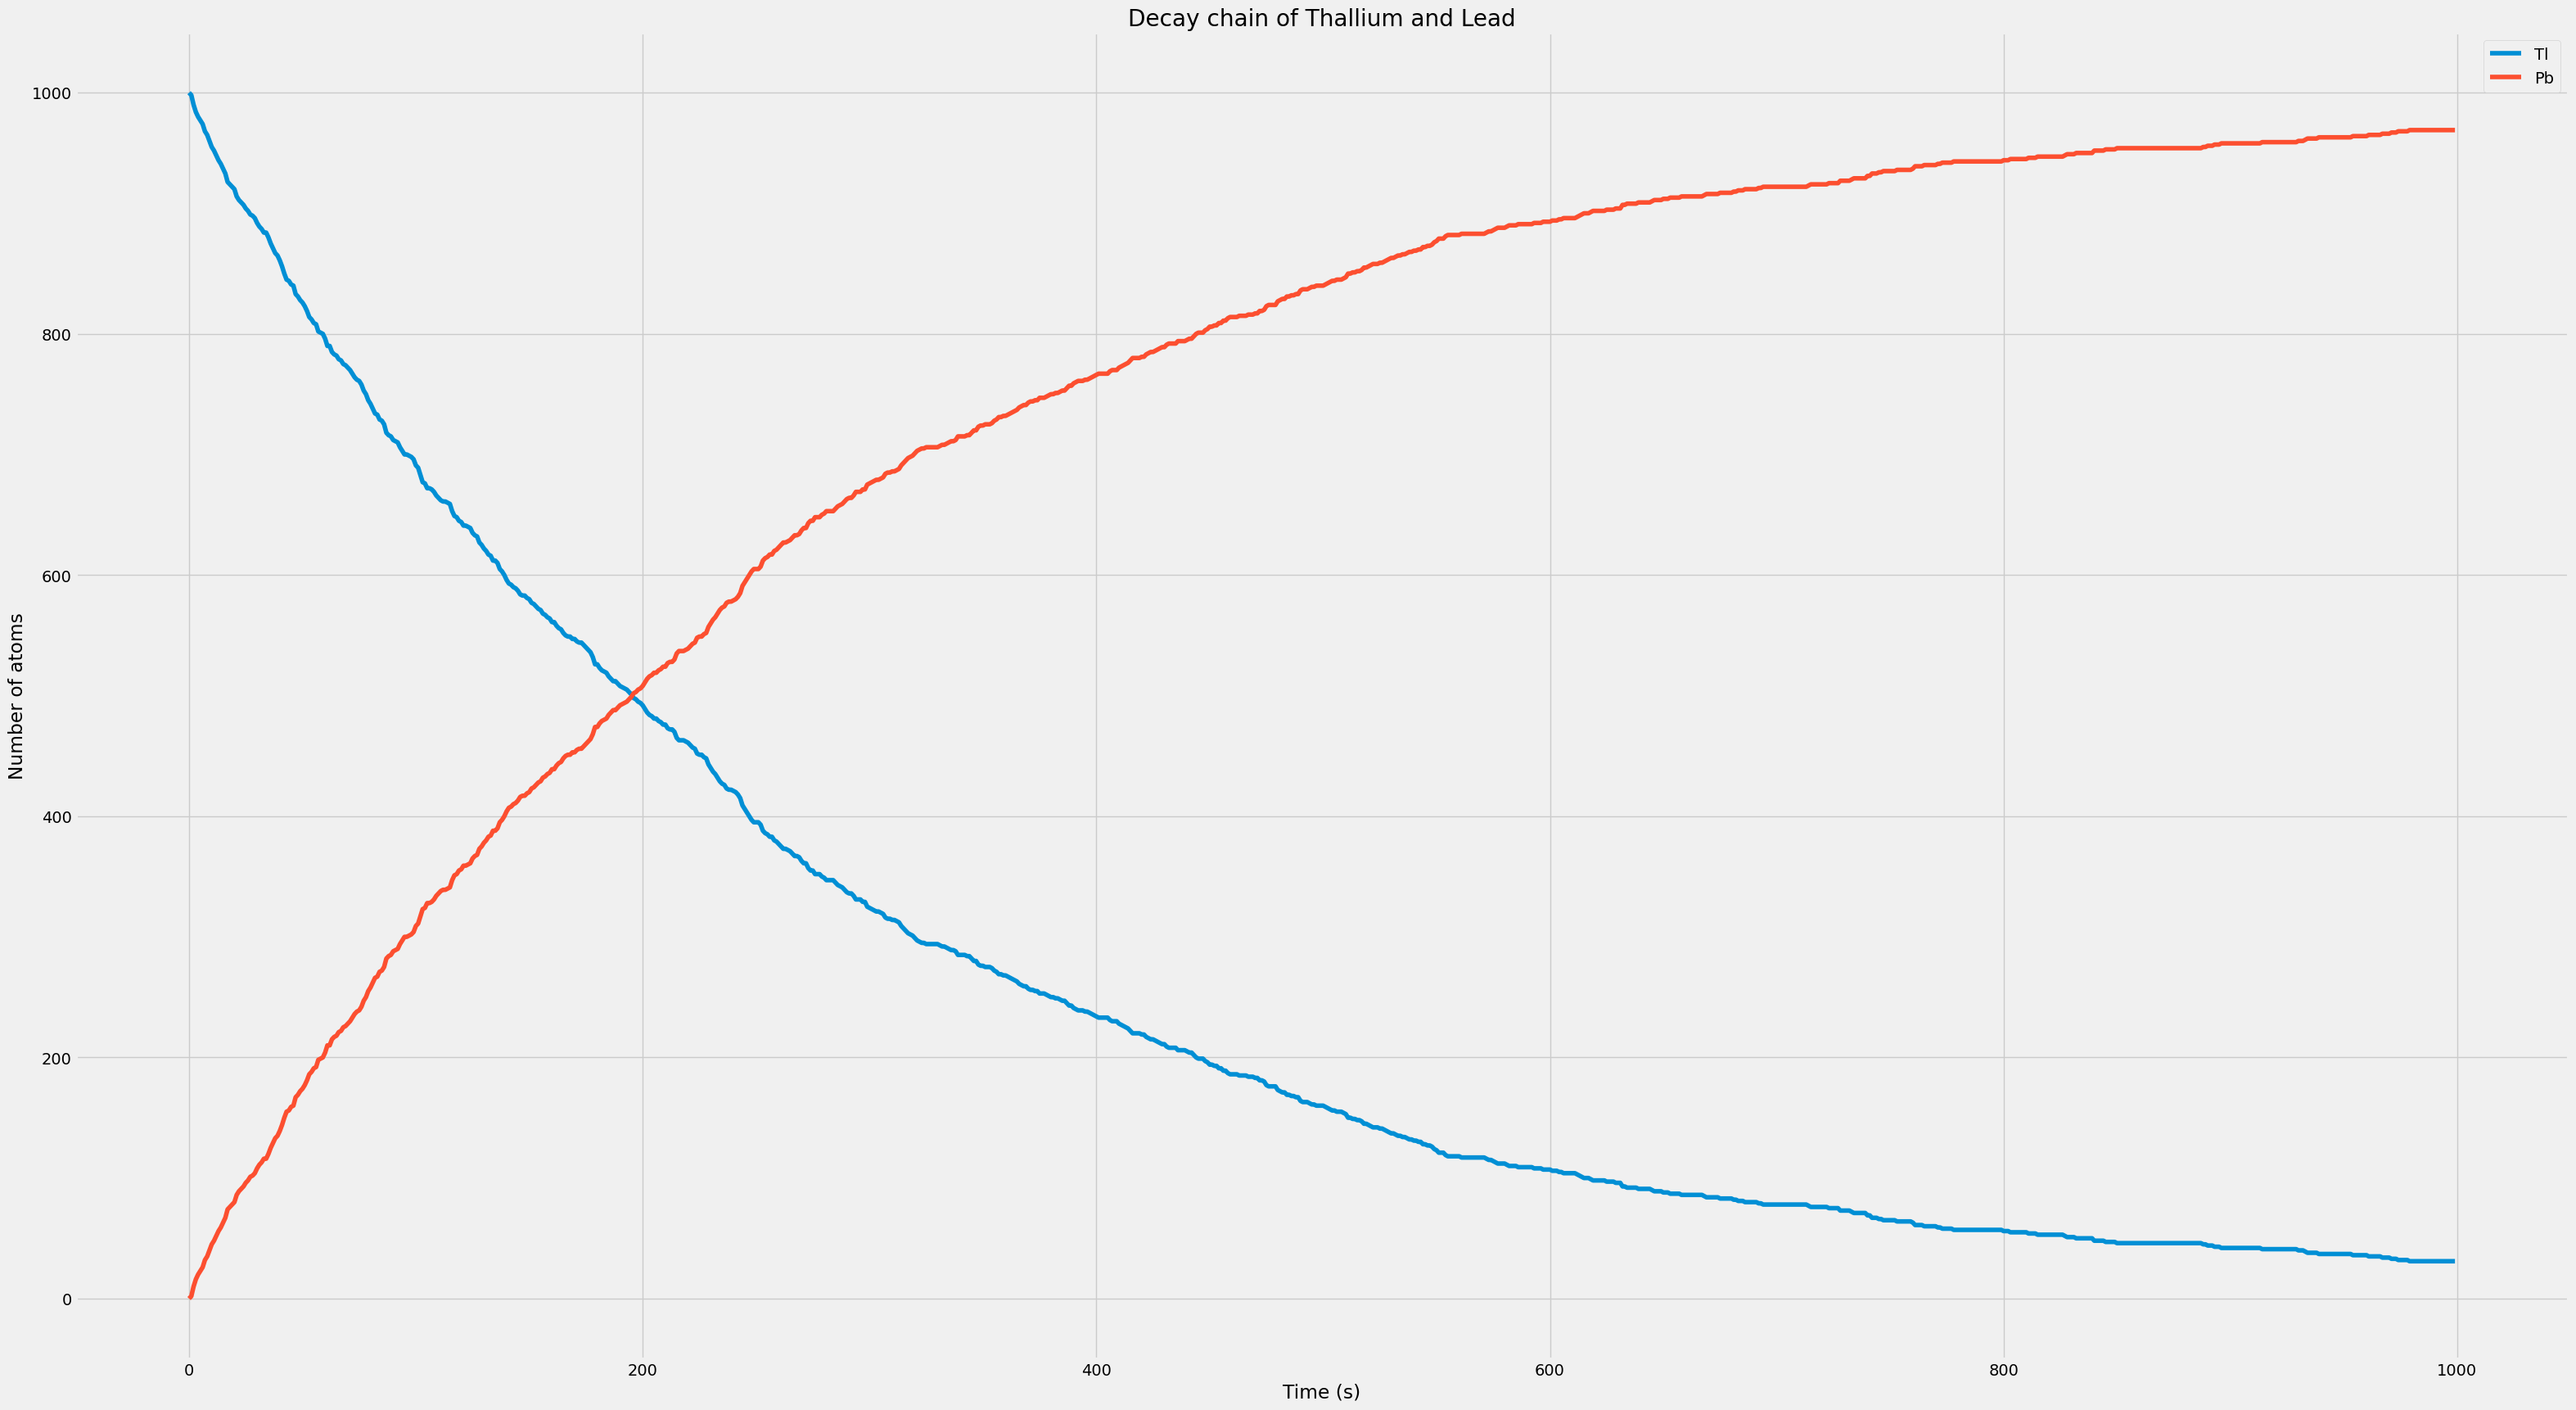

In [ ]:
# Initial values of Thallium , Lead and period
tl = 1000
pb = 0
period = 3.052*60

# the  probability at  t
p = lambda t : 1-2**(-t/period)

# Non-uniform probability distribution
p = lambda t : (2**(-t/τ))* np.log(2)/τ
F = lambda x : 1 - 1/2**(x/τ)

# Inverse cumulative distribution function of F(x)
inverse_cdf = lambda x : -period * np.log2(1 - x)

decay_times  = inverse_cdf(np.random.random(size=(tl,)))
decay_times.sort()

evolution_history = [[tl,pb]]

for i in range(1,len(decay_times)):
    decay_count = np.sum(1 if (x>=i-1 and x < i) else 0 for x in decay_times)
    if(decay_count >= tl) or (tl == 0):
        evolution_history.append([0,1000])
        break
    else:
        tl -= decay_count
        pb += decay_count
        evolution_history.append([tl,pb])

# Ploting the evolution on  function of time
plt.figure(figsize=(35,20))
plt.plot(evolution_history)
plt.title('Decay chain of Thallium and Lead')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend(['Tl','Pb'])

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function:

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

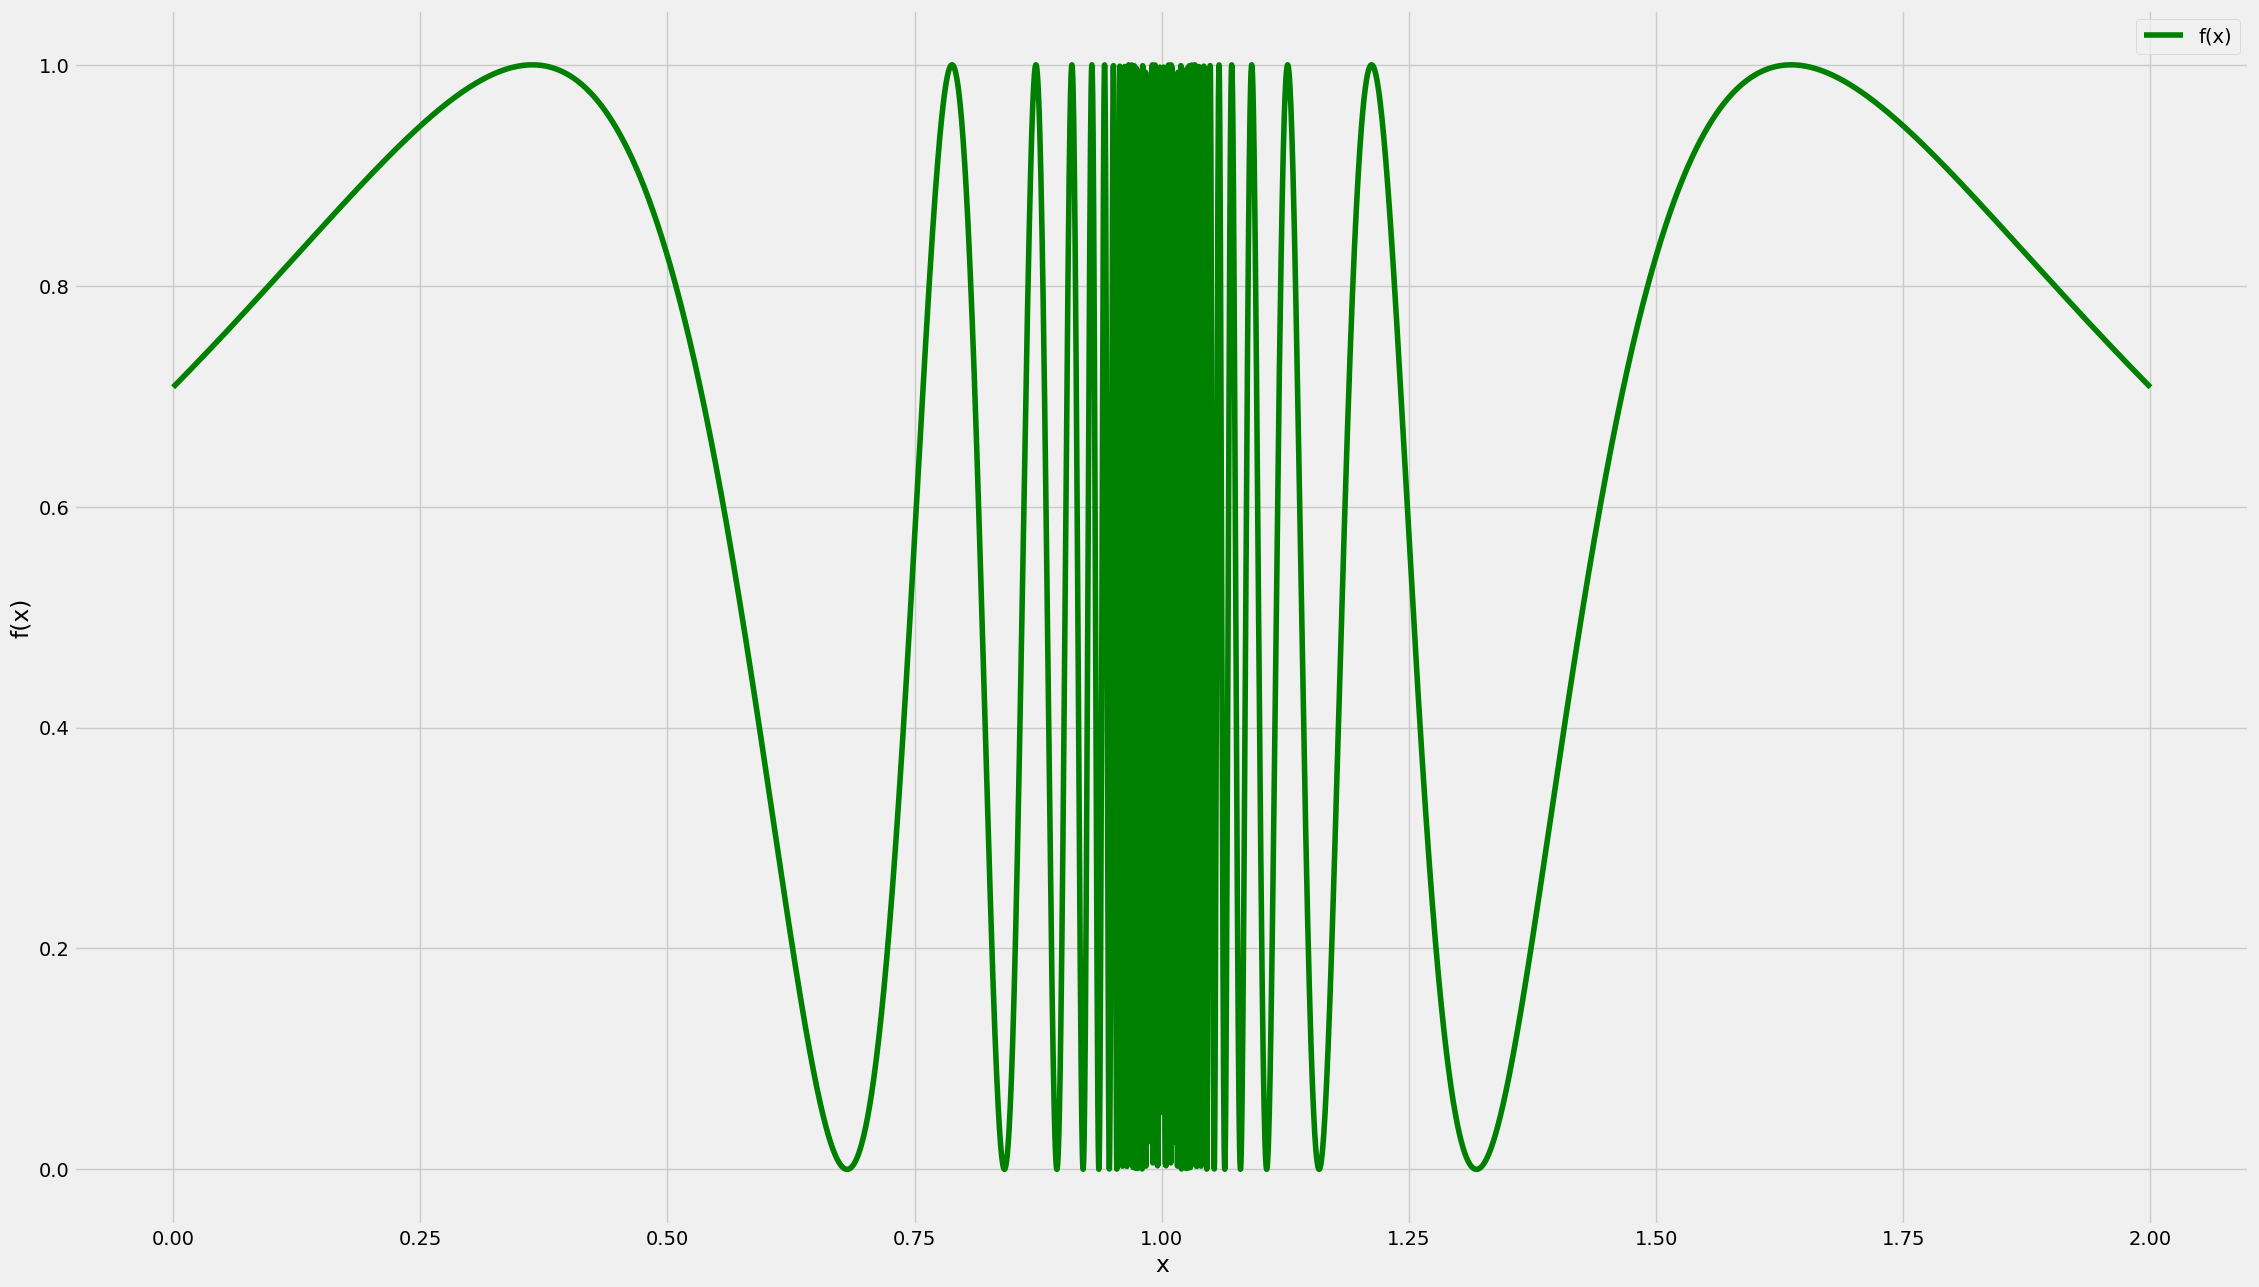

In [ ]:
f = lambda x : np.sin(1/(1 - x)) **2
# limits of integration
a = 0
b = 2
N  = 10000

x = np.linspace(a,b, N)

# Ploting the function
plt.figure(figsize=(25,15))
plt.plot(x, f(x),color='green')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)'])

In [ ]:
def df(x):
    if x == 1:
        return 0
    else:
        return np.sin(1/(1 - x)) ** 2
Integral_true, error = integrate.quad(df,a,b)
print("True integral:", Integral_true)

True integral: 1.3471135014273619


<ipython-input-11-e27ae07b9e70>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral_true, error = integrate.quad(df,a,b)


In [ ]:
hits = 0
for i in range(N):
    x = b*np.random.random()
    y = np.random.uniform(0, 1)
    if y <= f(x):
        hits += 1

# variable to store sum of the functions f
integral = (b - a) * (hits / N)
print("Integral:", integral)
print('Error:', abs(Integral_true-integral))

Integral: 1.3462
Error: 0.0009135014273617958


In [ ]:
total = 0
for i in range(N):
    x = b * np.random.uniform()
    total += f(x)
integral = (b - a) * (total / N)
print(" The Integral:", integral)
print('The Error:', abs(Integral_true-integral))

 The Integral: 1.3471409166696497
The Error: 2.7415242287887054e-05


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array}
\right.
$$

* Generalize the result for a 10D sphere.

In [ ]:
# Function
def fun_ction(x):
  s = np.sum(i**2 for i in x)
  if s <= 1 :
    return 1
  else :
    return 0

In [ ]:
# limits of integration
a = -1
b = 1
N = 100000
dim = 2
x = np.random.uniform(-1, 1, size=(N, dim))
Integral_true = np.pi * a**2
Integral_true

3.141592653589793

In [ ]:
I = np.sum([f(i) for i in x ])
print('the integral = ' , (2**dim)*I/N )
print('Error:', abs(Integral_true-integral))

the integral =  4.337402515486906
Error: 1.1958098618971125


In [ ]:
# 10D sphere
dimension=10
# Generating Nx10 random samples from the interval [-1, 1]
x = np.random.uniform(-1, 1, size=(N, dimension))
I = np.sum([f(i) for i in x ])
integral = (2**dimension)*I/N
integral

5548.489687855693

4\. **Monte Carlo integration with importance sampling**

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [ ]:
f = lambda x : x**(-1/2)/(np.exp(x) + 1 )
w = lambda x : 1/np.sqrt(x)
inv_cdf = lambda x : (x**2)/4
a = 0
b = 1
N = 100000
x = np.random.uniform(0, 2, size=N)
Integral_true, error = integrate.quad(f,a,b)
Integral_true

0.8389329600133838

In [ ]:
# the value of integral of w in [0,1]
w_integral = 2

x = inv_cdf(x)
integral = np.sum(f(x)/w(x))*(w_integral/N)
integral
print('Error:', abs(Integral_true-integral))

Error: 0.00015695406322147054
